In [35]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('text', usetex = False)

%matplotlib inline

1)
--

In [2]:
n = 1    # particle denisty [cm^-3]
D = 100*3.086E18    # cloud depth [cm]
N = n*D    # column density [cm^-2]

tau_nu_1a = .001
tau_nu_1b = 1
tau_nu_1c = 1000

sigma_nu_1a = tau_nu_1a/n/D
sigma_nu_1b = tau_nu_1b/n/D
sigma_nu_1c = tau_nu_1c/n/D

print 'Column density =', N, 'cm^-2'
print 'Cross section (a) =', sigma_nu_1a, 'cm^-2'
print 'Cross section (b) =', sigma_nu_1b, 'cm^-2'
print 'Cross section (c) =',sigma_nu_1c, 'cm^-2'

Column density = 3.086e+20 cm^-2
Cross section (a) = 3.24044069994e-24 cm^-2
Cross section (b) = 3.24044069994e-21 cm^-2
Cross section (c) = 3.24044069994e-18 cm^-2


2)
--

In [3]:
def specificIntensity(sigma_nu, I_nu0, S_nu):
    nds = 10**3
    ds = D/nds
    d = np.linspace(0, D, num = nds)
    I_nu = np.zeros(len(d))
    I_nu[0] = I_nu0
    I_nu_prev = I_nu0

    for i in range(len(d) - 1):
        dI_nu = n*sigma_nu*ds*(S_nu - I_nu_prev)
        I_nu[i + 1] = I_nu[i] + dI_nu
        I_nu_prev = I_nu[i + 1]
        
    return (d, I_nu)

I_nu(D) = 0.0456076074828


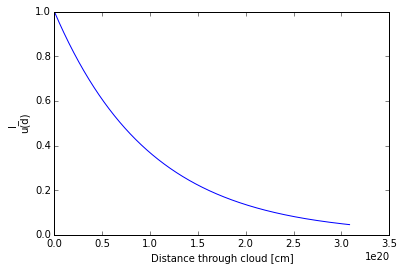

In [36]:
(d, I_nu) = specificIntensity(10**-20, 1, 0)

plt.figure(0)
plt.plot(d, I_nu)
plt.xlabel('Distance through cloud [cm]')
plt.ylabel('I_\nu(d)')
print 'I_nu(D) =', I_nu[-1]

3)
--

In [38]:
def gen_sigma(f, type, fwhm, sigma_nu0):
    if type == 'gaussian':
        sigma = sigma_nu0*signal.gaussian(len(f), std = fwhm/2)
    elif type == 'linear':
        sigma = np.full(len(f), sigma_nu0, dtype = np.float)
    
    return sigma

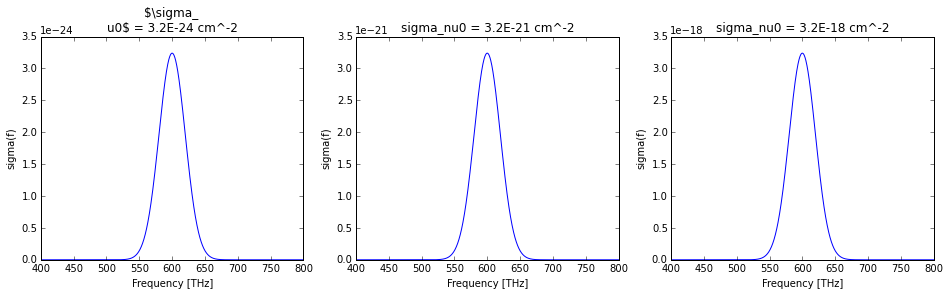

In [39]:
f = np.linspace(400E12, 800E12, 1000)
fwhm = len(f)/10.
sigma_1a = gen_sigma(f, 'gaussian', fwhm, sigma_nu_1a)
sigma_1b = gen_sigma(f, 'gaussian', fwhm, sigma_nu_1b)
sigma_1c = gen_sigma(f, 'gaussian', fwhm, sigma_nu_1c)

plt.figure(1, figsize = (16, 4))

plt.subplot(131)
plt.plot(f/10**12, sigma_1a)
plt.xlabel('Frequency [THz]')
plt.ylabel('sigma(f)')
plt.title('$\sigma_\nu0$ = 3.2E-24 cm^-2')

plt.subplot(132)
plt.plot(f/10**12, sigma_1b)
plt.xlabel('Frequency [THz]')
plt.ylabel('sigma(f)')
plt.title('sigma_nu0 = 3.2E-21 cm^-2')

plt.subplot(133)
plt.plot(f/10**12, sigma_1c)
plt.xlabel('Frequency [THz]')
plt.ylabel('sigma(f)')
plt.title('sigma_nu0 = 3.2E-18 cm^-2')

4)
--

(0, 1.2)

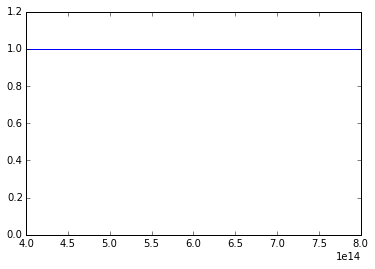

In [40]:
sigma_nu_4a = gen_sigma(f, 'linear', 0, 10)
I_nu_4a = np.zeros(len(f))
for i in range(len(f)):
    (temp_d, temp_I_nu) = specificIntensity(sigma_nu_4a[i], 1, 1)
    I_nu_4a[i] = temp_I_nu[-1]
plt.figure(2)
plt.plot(f, I_nu_4a)
plt.ylim((0, 1.2))

(0, 1.2)

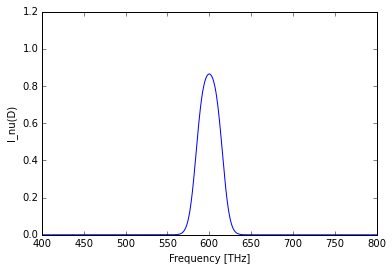

In [48]:
sigma_nu_4b = gen_sigma(f, 'gaussian', 50, 2/n/D)
I_nu_4b = np.zeros(len(f))
for i in range(len(f)):
    (temp_d, temp_I_nu) = specificIntensity(sigma_nu_4b[i], 0, 1)
    I_nu_4b[i] = temp_I_nu[-1]
plt.figure(4)
plt.plot(f/10**12, I_nu_4b)
plt.xlabel('Frequency [THz]')
plt.ylabel('I_nu(D)')
plt.ylim((0, 1.2))

(0, 1.2)

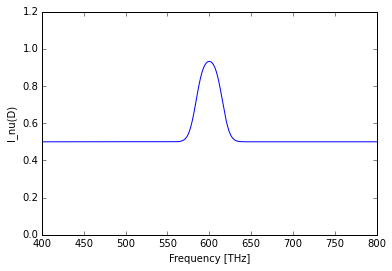

In [49]:
sigma_nu_4c = gen_sigma(f, 'gaussian', 50, 2/n/D)
I_nu_4c = np.zeros(len(f))
for i in range(len(f)):
    (temp_d, temp_I_nu) = specificIntensity(sigma_nu_4c[i], .5, 1)
    I_nu_4c[i] = temp_I_nu[-1]
plt.figure(5)
plt.plot(f/10**12, I_nu_4c)
plt.xlabel('Frequency [THz]')
plt.ylabel('I_nu(D)')
plt.ylim((0, 1.2))

(0, 1.2)

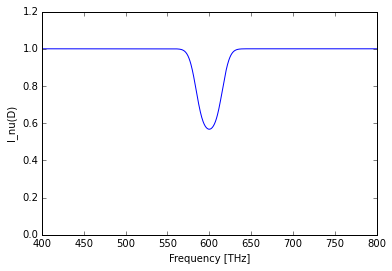

In [50]:
sigma_nu_4d = gen_sigma(f, 'gaussian', 50, 2/n/D)
I_nu_4d = np.zeros(len(f))
for i in range(len(f)):
    (temp_d, temp_I_nu) = specificIntensity(sigma_nu_4d[i], 1, .5)
    I_nu_4d[i] = temp_I_nu[-1]
plt.figure(6)
plt.plot(f/10**12, I_nu_4d)
plt.xlabel('Frequency [THz]')
plt.ylabel('I_nu(D)')
plt.ylim((0, 1.2))

(0, 1.2)

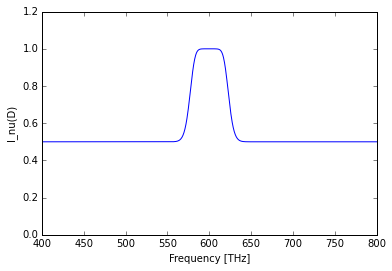

In [51]:
sigma_nu_4e = gen_sigma(f, 'gaussian', 50, 10/n/D)
I_nu_4e = np.zeros(len(f))
for i in range(len(f)):
    (temp_d, temp_I_nu) = specificIntensity(sigma_nu_4e[i], .5, 1)
    I_nu_4e[i] = temp_I_nu[-1]
plt.figure(7)
plt.plot(f/10**12, I_nu_4e)
plt.xlabel('Frequency [THz]')
plt.ylabel('I_nu(D)')
plt.ylim((0, 1.2))

(0, 1.2)

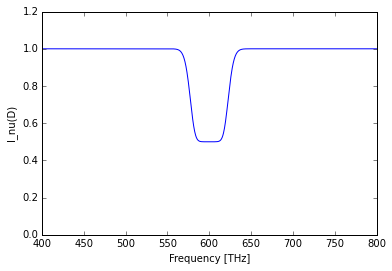

In [52]:
sigma_nu_4f = gen_sigma(f, 'gaussian', 50, 10/n/D)
I_nu_4f = np.zeros(len(f))
for i in range(len(f)):
    (temp_d, temp_I_nu) = specificIntensity(sigma_nu_4f[i], 1, .5)
    I_nu_4f[i] = temp_I_nu[-1]
plt.figure(8)
plt.plot(f/10**12, I_nu_4f)
plt.xlabel('Frequency [THz]')
plt.ylabel('I_nu(D)')
plt.ylim((0, 1.2))

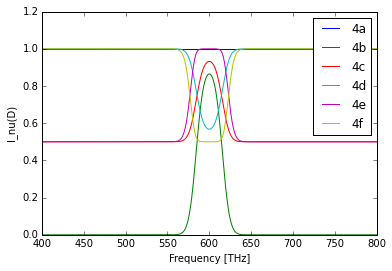

In [54]:
plt.figure(9)
plt.plot(f/10**12, I_nu_4a)
plt.plot(f/10**12, I_nu_4b)
plt.plot(f/10**12, I_nu_4c)
plt.plot(f/10**12, I_nu_4d)
plt.plot(f/10**12, I_nu_4e)
plt.plot(f/10**12, I_nu_4f)
plt.ylim((0, 1.2))
plt.xlabel('Frequency [THz]')
plt.ylabel('I_nu(D)')
plt.legend(('4a', '4b', '4c', '4d', '4e', '4f'))